<h1>Multilayer Perceptron : MLP</h1>

SVMと同様に、データが「同質」な場合、つまりすべての特徴量が同じ意味を持つ場合に、最もよく機能する<br>
さまざまな種類の特徴量を持つデータに関しては、決定木に基づくモデルの方が性能が良いだろう<br>
ニューラルネットワークのパラメータを調整する一般的なやり方は次のようになる。まずは過剰適合できるように大きいネットワークを作り、タスクがそのネットワークで訓練データを学習できることを確認する。次に、ネットワークを小さくするか、alphaを増やして正則化を強化して、凡化性能を向上させる<br>
ニューラルネットワークは学習を開始する前に重みを乱数で割り当てる。この乱数による初期化の影響が、学習されるモデルに影響を与える<br>
ニューラルネットワークの複雑さも、リッジ回帰や線形クラス分類器で行ったのと同様に、l2ペナルティで重みを0に近づけることで、制御することが可能

<h4>・重要なパラメータ</h4>
①隠れ層の数（デフォルトは 1）<br>
　基本的には、隠れ層を増やすと決定境界は滑らかに（複雑に）なる<br>
②隠れユニットの数（デフォルトは 100）<br>
　隠れ層あたりのノードの数は、入力層と同じくらいにすることが多いが、数千より大きくなることはあまりない<br>
　基本的には、隠れユニットを増やすと決定境界は滑らかに（複雑に）なる<br>
③alpha（デフォルトは 0.0001）<br>
　alphaを大きくする⇒係数の制約が強くなる、alphaを小さくする⇒係数の制約が弱くなる（=複雑なモデルになる）<br>
④activation（活性化関数, {"identity", "logistic", "tanh", "relu"}, default = "relu"）<br>
⑤solver（パラメータ更新アルゴリズム, {"lbfgs", "sgd", "adam"}, default = "adam"）<br>
　adam⇒ほとんどのケースでよく機能するが、データのスケールにとても敏感（従って、データを平均0,分散1にしておくことが重要）<br>
　lbfgs⇒頑健だが、モデルが大きい場合や、大規模なデータセットに対しては、訓練に時間がかかる

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [2]:
from sklearn.datasets import make_moons

In [3]:
X, y = make_moons(n_samples = 100, noise = 0.25, random_state = 3)

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 42)

In [6]:
from sklearn.neural_network import MLPClassifier

In [7]:
# 10隠れユニット
mlp = MLPClassifier(solver = "lbfgs", random_state = 0, hidden_layer_sizes = [10], max_iter = 1000).fit(X_train, y_train)

In [8]:
import mglearn

Text(0, 0.5, 'Feature 1')

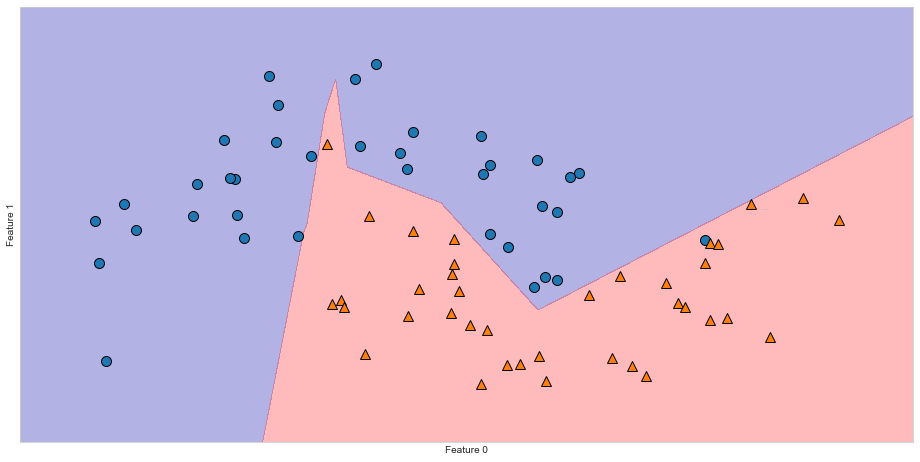

In [9]:
plt.figure(figsize = (16, 8))
mglearn.plots.plot_2d_separator(mlp, X_train, fill = True, alpha = .3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [10]:
# 100隠れユニット
mlp = MLPClassifier(solver = "lbfgs", random_state = 0, max_iter = 1000).fit(X_train, y_train)

Text(0, 0.5, 'Feature 1')

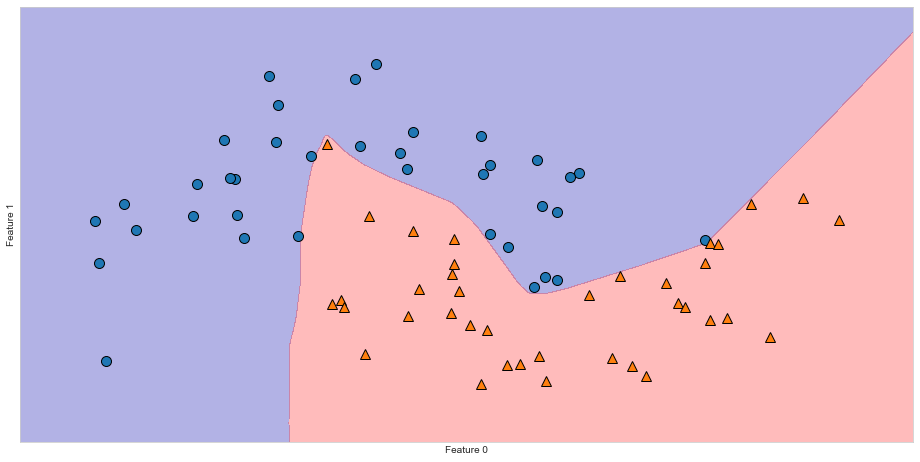

In [11]:
plt.figure(figsize = (16, 8))
mglearn.plots.plot_2d_separator(mlp, X_train, fill = True, alpha = .3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [12]:
# それぞれ10ユニットの隠れ層を2層使う
mlp = MLPClassifier(solver = "lbfgs", random_state = 0, hidden_layer_sizes = [10, 10], max_iter = 1000).fit(X_train, y_train)

Text(0, 0.5, 'Feature 1')

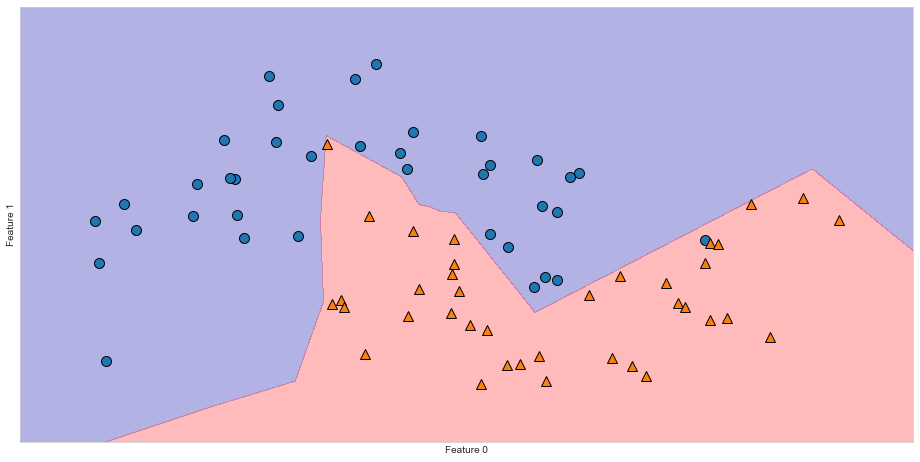

In [13]:
plt.figure(figsize = (16, 8))
mglearn.plots.plot_2d_separator(mlp, X_train, fill = True, alpha = .3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [14]:
# それぞれ10ユニットの隠れ層を2層使う、さらに非線形活性化関数にtanhを使う
mlp = MLPClassifier(solver = "lbfgs", random_state = 0, hidden_layer_sizes = [10, 10], activation = "tanh", max_iter = 1000).fit(X_train, y_train)

Text(0, 0.5, 'Feature 1')

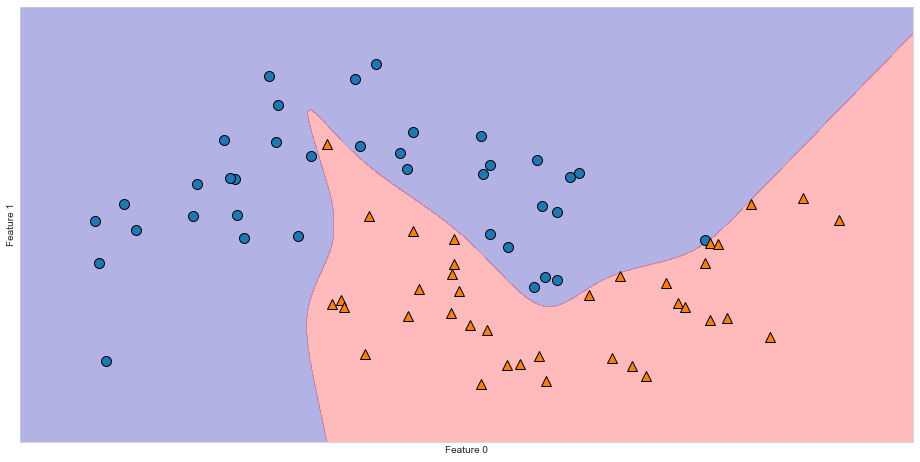

In [15]:
plt.figure(figsize = (16, 8))
mglearn.plots.plot_2d_separator(mlp, X_train, fill = True, alpha = .3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [16]:
from sklearn.datasets import load_breast_cancer

In [17]:
cancer = load_breast_cancer()

In [18]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)

In [19]:
mlp = MLPClassifier(random_state = 42).fit(X_train, y_train)

In [20]:
print(f"Accuracy on training set: {mlp.score(X_train, y_train):.3f}")
print(f"Accuracy on test set: {mlp.score(X_test, y_test):.3f}")

Accuracy on training set: 0.939
Accuracy on test set: 0.916


In [21]:
mean_on_train = X_train.mean(axis = 0)
std_on_train = X_train.std(axis = 0)
X_train_scaled = (X_train - mean_on_train) / std_on_train
X_test_scaled = (X_test - mean_on_train) / std_on_train

In [22]:
mlp = MLPClassifier(random_state = 42, max_iter = 1000).fit(X_train_scaled, y_train)

In [23]:
print(f"Accuracy on training set: {mlp.score(X_train_scaled, y_train):.3f}")
print(f"Accuracy on test set: {mlp.score(X_test_scaled, y_test):.3f}")

Accuracy on training set: 1.000
Accuracy on test set: 0.965


In [24]:
mlp = MLPClassifier(alpha = 1, random_state = 42, max_iter = 1000).fit(X_train_scaled, y_train)

In [25]:
print(f"Accuracy on training set: {mlp.score(X_train_scaled, y_train):.3f}")
print(f"Accuracy on test set: {mlp.score(X_test_scaled, y_test):.3f}")

Accuracy on training set: 0.986
Accuracy on test set: 0.979
